**SVM BOOSTER**

In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df2 = pd.read_csv("/content/sample_data/Magic.csv")
df1 = pd.read_csv("/content/sample_data/letter-recognition.csv")
df1=df1.rename({'letter': 'label'}, axis=1)
df2 = df2.rename({'class': 'label'}, axis=1)

FileNotFoundError: ignored

In [ ]:
df1

,label,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
df2=df2.drop(['Unnamed: 0'],axis = 1)
df2

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,24.9780,10.4139,2.3720,0.4713,0.2611,4.7655,19.6654,-7.2048,52.3631,71.2231,g
1,76.9940,34.6919,2.9914,0.1887,0.0943,74.6132,47.4990,31.0558,16.9967,260.0460,g
2,22.7427,12.9078,2.2122,0.5767,0.3221,11.4307,13.8894,7.7220,5.1628,192.1320,g
3,52.1044,17.2225,2.9523,0.3248,0.2037,29.9876,52.6747,-7.3971,5.8345,263.5820,g
4,12.8955,11.3480,2.1538,0.7368,0.4105,-14.9658,7.3404,-10.6825,22.1180,46.7654,g
...,...,...,...,...,...,...,...,...,...,...,...
5649,66.2175,21.5481,2.6862,0.3337,0.1905,72.7696,56.5129,16.6424,17.6995,231.7560,g
5650,34.4834,18.7860,2.9978,0.3226,0.2055,24.9496,13.8016,-12.3416,9.3170,163.2700,g
5651,17.9508,10.0082,2.3962,0.6506,0.3996,-0.7530,5.1400,7.2953,34.2560,155.1830,g
5652,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g


In [ ]:
df1=df1.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)
df1=df1.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)
df1

,label,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
df2['label'][1812]='g'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
count0=0
for i in range(m):
  if ord(df2['label'][i])==ord('g'):
    df2['label'][i]=1
    count0+=1
  else:
    if ord(df2['label'][i])==ord('h'):
     df2['label'][i]=-1  
print(count0)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


5654


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,24.9780,10.4139,2.3720,0.4713,0.2611,4.7655,19.6654,-7.2048,52.3631,71.2231,1
1,76.9940,34.6919,2.9914,0.1887,0.0943,74.6132,47.4990,31.0558,16.9967,260.0460,1
2,22.7427,12.9078,2.2122,0.5767,0.3221,11.4307,13.8894,7.7220,5.1628,192.1320,1
3,52.1044,17.2225,2.9523,0.3248,0.2037,29.9876,52.6747,-7.3971,5.8345,263.5820,1
4,12.8955,11.3480,2.1538,0.7368,0.4105,-14.9658,7.3404,-10.6825,22.1180,46.7654,1
...,...,...,...,...,...,...,...,...,...,...,...
5649,66.2175,21.5481,2.6862,0.3337,0.1905,72.7696,56.5129,16.6424,17.6995,231.7560,1
5650,34.4834,18.7860,2.9978,0.3226,0.2055,24.9496,13.8016,-12.3416,9.3170,163.2700,1
5651,17.9508,10.0082,2.3962,0.6506,0.3996,-0.7530,5.1400,7.2953,34.2560,155.1830,1
5652,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1


In [ ]:
tr_data2=df2.sample(frac=0.67)
tr_data1=df1.sample(frac=0.67)
te_data2 = df2.drop(tr_data2.index)
te_data1= df1.drop(tr_data1.index)
# tr_data=tr_data.sample(n=2000,replace='False')
print(tr_data2.shape)
tr_data2

(3788, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
3018,102.9000,32.1181,3.0801,0.1522,0.0802,-184.3210,97.8900,19.4958,5.0421,194.7070,1
2747,122.5100,25.2937,3.2625,0.1284,0.0653,-130.9620,96.8182,-19.9955,2.8915,290.6570,1
4511,81.4054,25.1619,3.5143,0.1989,0.1014,-51.2494,70.7019,-16.5938,2.3840,288.8320,1
1391,26.9766,9.7238,2.3064,0.4593,0.2395,-12.3167,16.2870,1.6476,3.6750,197.3380,1
4536,28.3143,11.3820,2.4440,0.4101,0.2212,-10.3046,-9.2940,-7.2713,10.6780,199.5320,1
...,...,...,...,...,...,...,...,...,...,...,...
1325,28.7554,15.8285,2.4166,0.4100,0.2280,-30.0709,-21.9132,13.5640,2.9410,202.9190,1
625,13.0291,10.6045,2.1021,0.7668,0.4941,13.1053,2.9585,-8.6190,11.9290,195.5410,1
1936,26.6910,18.6079,2.7868,0.3611,0.1855,-15.1237,19.2808,-8.4267,0.5330,92.9824,1
2848,25.9826,13.9899,2.6556,0.4243,0.2906,15.9402,8.8205,7.6890,4.7520,94.0805,1


In [ ]:
def loss(f,z):
    
    if f*z>1:
        return 0
    else:
        return (1-f*z)

In [ ]:
def rand_svm(tr_data,te_data):

    tot=0;
    cls = SVC(kernel='linear')
    accs=[]
    while tot<20:
        Data_random=tr_data.sample(n=500)
        X_train = Data_random.drop(['label'],axis = 1)
        y_train = Data_random['label']
        y_train=y_train.astype('int')
        X_test = te_data.drop(['label'],axis = 1)
        y_test =  te_data['label']
        y_test=y_test.astype('int')
        cls.fit(X_train,y_train)
        y_pred = cls.predict(X_test)
        tot+=1
        acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
        accs.append(1-acc)
    plt.title("Random SVM")  
    plt.xlabel("X axis")  
    plt.ylabel("Miss Classification Rates")  
    plt.plot(np.arange(1,21), accs, color ="green")  
    plt.show()
    return 100*np.mean(accs),100*np.std(accs)

**MARKOV SAMPLING**

In [ ]:
def sampling_markov(df):

    cls = SVC(kernel='linear')
    T=5
    N=len(df)
    rsample = df[0:0]
    t=0
    while t<T:
            sample = df[0:0]
            dtr=df.copy()
            X_train = dtr.drop(['label'],axis = 1)
            y_train = dtr['label']
            y_train=y_train.astype('int')
            cls.fit(X_train,y_train)
            makva=5
            kval=0
            m0=0
            m1=0
            Z_t=dtr.sample(n=1)
            Z_tl=Z_t.to_numpy()
            id=len(sample)
            sample = sample.append(pd.DataFrame(Z_tl,index=[id+1],columns=sample.columns))
            dtr=dtr.drop(Z_t.index)
            Y_l=Z_t['label'].to_numpy()
            Y_t=Y_l[0]
            if Y_t==-1:
                m0+=1
            else:
                m1+=1
            Y_dst=cls.predict(Z_t.drop(['label'],axis = 1))
            
            i=0
            while i<N and len(dtr)>0:
                id=len(sample)
                zst=dtr.sample(n=1)
                Z_std=zst.to_numpy()
                dtr=dtr.drop(zst.index)
                Y_sl=zst['label'].to_numpy()
                yst=Y_sl[0]
                Y_dis=cls.predict(zst.drop(['label'],axis = 1))
                pr=math.exp(-loss(Y_dis,Y_dis))/math.exp(-loss(Y_dst,Y_t))
                if pr==1 and Y_t==-1 and yst==-1:
                    sample = sample.append(pd.DataFrame(Z_std,index=[id+1],columns=sample.columns))
                elif pr==1 and Y_t==1 and yst==1:
                    sample = sample.append(pd.DataFrame(Z_std,index=[id+1],columns=sample.columns))
                elif (pr==1 and Y_t*yst==-1) or pr<0:
                    sample = sample.append(pd.DataFrame(Z_std,index=[id+1],columns=sample.columns))
                elif pr>1:
                    sample = sample.append(pd.DataFrame(Z_std,index=[id+1],columns=sample.columns))
                elif kval==makva:
                    sample = sample.append(pd.DataFrame(Z_std,index=[id+1],columns=sample.columns))
                    kval=0
                else:
                    kval+=1
                Z_t=zst
                if yst==-1:
                    m0+=1
                else:
                    m1+=1
            i=i+1
            X_train = sample.drop(['label'],axis = 1)
            y_train = sample['label']
            y_train=y_train.astype('int')
            cls.fit(X_train,y_train)
            rsample=sample
            t=t+1
    return rsample

In [ ]:
def after_markov_svm(tr_data,te_data):
    tot=0;
    cls = SVC(kernel='linear')
    accs=[]
    while tot<20:
            dtr=tr_data.sample(n=500)
            dtr.reset_index(drop=True, inplace=True)  
            Data_markov=sampling_markov(dtr)
            # print(Data_markov.shape)
            X_train = Data_markov.drop(['label'],axis = 1)
            y_train = Data_markov['label']
            y_train=y_train.astype('int')
            X_test = te_data.drop(['label'],axis = 1)
            y_test =  te_data['label']
            y_test=y_test.astype('int')
            cls.fit(X_train,y_train)
            y_pred = cls.predict(X_test)
            acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
            accs.append(1-acc)
            tot+=1
    plt.title("Markov SVM")  
    plt.xlabel("X axis")  
    plt.ylabel("Miss Classification Rates")  
    plt.plot(np.arange(1,21), accs, color ="green")  
    plt.show()
    return 100*np.mean(accs),100*np.std(accs)

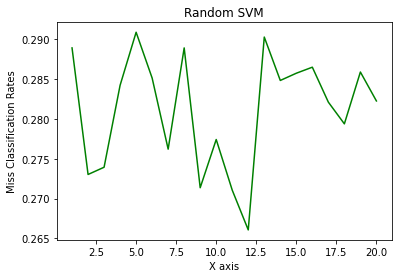

mean misclassification (random sample) for letter (28.121969696969696, 0.7067247981443773)


In [ ]:
print("mean misclassification (random sample) for letter",rand_svm(tr_data1,te_data1))

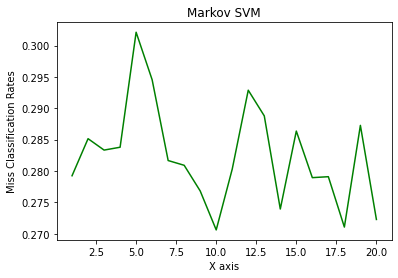

mean misclassification rate (markov sample) for letter (28.245454545454546, 0.7905200482847531)


In [ ]:
print("mean misclassification rate (markov sample) for letter",after_markov_svm(tr_data1,te_data1))